<a href="https://colab.research.google.com/github/GladysJoseph/github_python_repo/blob/main/Used_Car_Final_Project__Capstone_2023_Gladys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  

  ## Gladys Joseph  
  
    
    







                     ##**Capstone  Final Project**





                      ##**Used Car Prediction**






                       **August 11, 2023**  
*







---
##**Executive Summary:**

In the response to the growing demand for pre-owned vehicles and the need for a robust pricing strategy, this project aimed to develop a predictive model for estimating the pricing of used cars.  The goal was to ensure informed decision-making for both buyers and sellers int he used car market.

The dataset revealed the was a shift in consumer preferences from new  to used cars has led to increased demand for pre-owned vehicles. This caused  inconsistency with pricing of the vehicles and it also underscored the importance of having accurate pricing to meet the market demand.  

There are many factors when pricing vehicles, some factors to consider are: Year, Make, Model, Class/version, transmission, mileage, previous owner count, and many more factors that fits ones need. To accurately price the cars, it requires addressing the data and the limited amount of available and the not available data.  

The key takeaways in this project was the market of shift in consumers preferences of purchasing used vehicles starting approximately 2005 to and increased of major demand in 2011 to 2018 and a slight decrease in 2019 and 2020. Engine with a high concentration were from 1000 to 3000.
Vehicle with automatic was the major selling vehicle in the market.  Those with with 5 seaters were the highest sellers compared to other vehicles that seatings from two - ten seats.
To further analyze the data to get optimal pricing and to leverage insights, a few predictive models were implemented that can optimize pricing to cater to market demands.  The methodologies that were conducted in this analysis were Random Forest  and Decision Tree with additonal optimizer that evaluated the performance of the models.  

The model performance

Model One: The initial model showed decent performance with **RMSE of 0.4647, R-squared of 0.6129, and MAE of 4.1017.** Tuned Model: After hyperparameter tuning, the tuned model had improved performance with RMSE of 0.4640, R-squared of 0.6142, and MAE of 4.0845. Model Two (Decision Tree Regressor): This model showed an RMSE of 7.5660, MAE of 4.0341, and R-squared of 0.5348. It seems to overfit the data as indicated by the high RMSE. Model Three (Decision Tree Regressor): Similar to Model Two, this model exhibited an RMSE of 7.5660, MAE of 4.0341, and R-squared of 0.5348. Predictions: The predicted values are as follows: [4.60507754, 6.66152937, 6.66152937, ..., 6.66152937, 10.90287863, 6.66152937]
During this iteration of the project we noticed that the first model is promising; however, we will aime for another iteration that will result in higher performance.




##**Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars slow down it is important to solve the issue of increased prices to meet an equitable cost for the market.  
In 2018-19, new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile.
With this in mind we have to resolve the issue by predicting the pricing of used cars based on various features given in the dataset. Predicting the pricing of used cars accurately is of significant importance in the automotive industry and the used car market. Sellers and buyers alike can benefit from having a reliable estimation of the car's price. For sellers, it helps set a competitive and reasonable selling price, while buyers can make informed decisions based on the predicted prices while factoring meaningfuls factors that are useful in predicting the car's new prices.
The dataset contains information about different cars, including their specifications, such as make, model, year, kilometers driven, fuel type, transmission type, owner type, mileage, engine displacement, power, and number of seats. Additionally, there is data on the new price of some cars, as well as the actual selling price of used cars.



##**Objectives:**

The main goal of this data science project is to construct reliable and precise predictive models capable of estimating the prices of used cars using their specific features. By developing an effective methodology for predicting pricing, the project aims to address inconsistencies in pricing.  This, in turn, will provide  sellers with valuable insights onhow to set competitive prices for their vehicles. This newfound transparency in pricing will not onlu benefit sellers but also buyersm as both parties will be better equipped to navigate market fluctions with more informed decisions.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**Dictionary**

In this exploratory analysis, I found that the UsedCar_Data, contains information about used cars and used cars attributes. The dataset contains 7253 entries and 14 features. Here is a brief description of each column:

S.No.: A serial number or index for each entry.

Name: The name or model of the car.

Location: The location where the car is available or being sold.

Year: The vehicle's manufactured year.

Kilometers_Driven: The total number of kilometers driven by the car.

Fuel_Type: The type of fuel used by the car (e.g., Petrol, Diesel, CNG, etc.). Transmission:

The type of transmission (e.g., Manual or Automatic).

Owner_Type: The number of previous owners and their type (e.g., First, Second, Third).

 Mileage: The mileage (fuel efficiency) of the car in kilometers per liter.

 Engine: The engine displacement of the car in cc (cubic centimeters).

 Power: The power output of the car's engine in bhp (brake horsepower).

 Seats: The number of seats available in the car.

 Price:  The previous selling  price of the vehicle

 New_price:  The asking price

 The following variables have missing values: "Mileage," "Engine," "Power," "Seats," "New_price," and "Price."

The data type for each column is also provided. Numeric columns (such as Year,Mileage, Kilometers_Driven which was changed to Mileage MPG, Engine, Power, Seats, New_price, and Price) have a float or integer data type, while categorical columns (such as Name, Location, Fuel_Type, Transmission, and Owner_Type) have an object data type.

**Import Required Libraries**



In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
# Importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

**Import Google Drive and Load Data**

In [ ]:
#Mount data drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##uploading dataset and reading it through my drive

df = pd.read_csv('/content/drive/MyDrive/used_cars.csv')

In [ ]:
 #Copying data to another variable to avoid any changes to the original data
data= df.copy()

##**Exploratory Data  Analysis**

The exploratory analysis revealed key insights about the dataset and its features. Some of the findings include:

Summary Statistics:

The dataset contains a total of 7253 entries with 14 features.
The numerical features are: Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price, and New_price exhibit a wide range of values.
Categorical features are: Name, Location, Fuel_Type, Transmission, and Owner_Type have various unique categories.

Missing Values:

Several columns have missing values, including Mileage, Engine, Power, Seats, New_price, and Price. These missing values need to be addressed during data preprocessing.
Numerical Features:

There are extreme values present in features like Kilometers_Driven, Engine, Power, and Price. Outliers might need to be handled to avoid biasing the model.
Categorical Features:

The "Location" feature includes various locations where cars are available for sale.
The "Fuel_Type" feature indicates the type of fuel used by the cars, with multiple categories like Petrol, Diesel, CNG, etc.
The "Transmission" feature specifies whether the car has a manual or automatic transmission.
The "Owner_Type" feature shows the number of previous owners and their type (First, Second, and Third).
The "Name" feature represents the name or model of each car.
Key Features Impacting Pricing:

The features that significantly influence the pricing of used cars include Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Fuel_Type, Transmission, and Owner_Type.
Mileage, Engine, Power, and Seats are likely to have a significant impact on the selling price.
Influence of Mileage, Engine, Power, etc.:

Mileage, Engine, and Power have a strong influence on the selling price. Generally, cars with higher mileage, larger engine displacement, and greater power tend to have higher prices.
Location and Year Impact:

The location where the car is available for sale (Location) and the year of manufacture (Year) might have an impact on the price. Cars in certain locations or newer model years might command higher prices.

Fuel Type and Transmission:

The type of fuel used (Fuel_Type) and transmission (Transmission) also play a role in pricing. Certain fuel types and transmission types might be preferred, influencing prices.

Data Cleaning:

Un-realistic or inconsistent values need to be handled, and missing values should be imputed or removed appropriately.
Overall, this exploratory analysis provides insights into the dataset's characteristics, patterns, and potential influences on used car prices. in the Exploratory analysis you will find the data preprocessing, feature engineering, model building, and evaluating the model's performance to predict used car prices accurately.




**Analyze Data**

In [ ]:
data.head

<bound method NDFrame.head of       S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fue

In [ ]:
data.tail

<bound method NDFrame.tail of       S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fue

**Observations_Data Description (Head & Tail)**




There is 7253 observation, 14 features, and the measurement of mileage is in Kilometer.  

There are many different names and many different locations

There are many missing data for New Price and Prices.

There are 3 fuil types: CNG(carbon), Diesel, and Pertroleum

Two types of transmission: Manual and Automatic

Owner_Type: First, Second, and Third


In [ ]:
# checking the data type of each column
data.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_price            float64
Price                float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Data Description (Data Type and Data information)**




There is 7253 observation, columns(features) 14

Objects-  Count  6: Name, Location, Fuel type, Transmission, Owner_Type  

Integers - Count 3: S. No., Year, Kilometers_Driven    

floats-  Count   4: Mileage, Engine, Power, Seats, New_Price, Price

Engine    has 7207 observations
Power     has 7078 observations
Seats     has 7200 observations
New_Price has 1006 Observations
Price     has 6019 observations

In [ ]:
data.shape

(7253, 14)

**Data Description**

There is 7253 observation, columns(features) 14

In [ ]:
data['Name'].nunique()

2041

**Observation**

Feature- Name has 2041 unique names and types of vehicles; it will be difficult to assess this; therefore, it would be best to drop that feature.

In [ ]:
data.isnull()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7249,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7250,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7251,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:
data.isnull().any()

S.No.                False
Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_price             True
Price                 True
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


** Observation**

There are many null observations in the dataset while the total observed rows is 7253 thie following features have:

**Engine**: has 7207 observations, the mean is 1.61, standard deviation is 595.285, The min is 72.00, the max is 5998, 75% of the data lies within this area.

**Power:** has 7078 observations, the mean is 1.127, standard deviation is 53.49, The min is 34.00, the max is 616.0, 75% of the data lies within this area showing 138.10.

**Seats:** has 7200 observations, the mean is 5.28, standard deviation is .8092, The min is 2.00, the max is 10.

**Price:** has 6019 observations, the mean is 9.47, standard deviation is 11.18, The min is 0.44, the max is 160.0, 75% of the data lies within this area showing 9.95.

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Length: 7253, dtype: bool

In [ ]:
#Checking for duplicate values in the data
data.duplicated().sum()

0

##**Data Preprocessing**

**Data Cleansing and Feature Engineering **

In [ ]:
import pandas as pd



# Drop rows where 'kilometer' is greater than 6,000,000 or less than 1,000
df = data.drop(df[(df['Kilometers_Driven'] > 6000000) | (df['Kilometers_Driven'] < 1000)].index)
df = df.drop(columns=['S.No.'])

# After dropping rows, the index might be jumbled. Reset the index if needed
df = df.reset_index(drop=True)

# Print the DataFrame to check the result
print(df)

                                                   Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7245                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7246                             Volkswagen Polo GT TSI      Mumbai  2015   
7247                             Nissan Micra Diesel XV     Kolkata  2012   
7248                             Volkswagen Polo GT TSI        Pune  2013   
7249  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine 

**Observations**

Remove the extreme numbers in the dataset within Kilometer.  Remove S.No. inthe dataset also .  There are 7250 remained in the dataset with 13 features.

In [ ]:


# Create a new DataFrame with the same structure as 'df'
result_df = pd.DataFrame()

# Loop through each column in 'df'
for column in df.columns:
    # Check if the element in 'price' column satisfies the condition and the element is not null
   result_df =(df['Kilometers_Driven'] > 1000) & (df['Kilometers_Driven'] < 6000000)



# If you want the result in True/False format instead of 1/0, you can use:
# result_df = result_df.astype(bool)

# Print the new DataFrame with True/False values based on the conditions
print(result_df)

0       True
1       True
2       True
3       True
4       True
        ... 
7245    True
7246    True
7247    True
7248    True
7249    True
Name: Kilometers_Driven, Length: 7250, dtype: bool


In [ ]:
df.info

<bound method DataFrame.info of                                                    Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7245                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7246                             Volkswagen Polo GT TSI      Mumbai  2015   
7247                             Nissan Micra Diesel XV     Kolkata  2012   
7248                             Volkswagen Polo GT TSI        Pune  2013   
7249  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmiss

In [ ]:
from pandas.core.frame import Axis

# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
df['Years_Car_age'] = 2023-data['Year']






In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


** Observation**

Year has been converted to a calculation of finding age

In [ ]:
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


In [ ]:
df = pd.DataFrame(data)
df = df.drop(columns=['S.No.'])


# Display the DataFrame
print(df)


                                                   Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine 

**Objective**
Reverify that S.No. was removed apply the drop function for S.No.

#**Summary Statistics**

In [ ]:
data.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


In [ ]:
#Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observation- Summary Statistics**

Data set has 7253 observations.


Year:  has 7253 observations, the mean is 2013, standard deviation is 3.25, The min is 1996, the max is 2019, 75% of the data lies within 2016.
Kilometers Driven: has 7253 observations, the mean is 58699, standard deviation is 84427, The min is 171, the max is 6500000.00, 75% of the data lies within this range at 73000.

Mileage : has 7251 observations, the mean is 18.141580, standard deviation is 4.562197, The min is 0.00, the max is 33.54, 75% of the data lies within this area with 21.100 miles per lit.

Engine: has 7207 observations, the mean is 1616.0, standard deviation is 595.285, The min is 72.00, the max is 33.54, 75% of the data lies within this area.

Power: has 7078 observations, the mean is 112.765, standard deviation is 53.49, The min is 34.20, the max is 616.0, 75% of the data lies within this area showing 138.10.

Seats:has 7200  observations, the mean is 5.28, standard deviation is 0.8092, The min is 2.00, the max is 10.

Price: has 6019 observations, the mean is 9.47, standard deviation is 11.18, The min is 0.44, the max is 1.600, 75% of the data lies within this area showing 9.95.

**Correlation table**

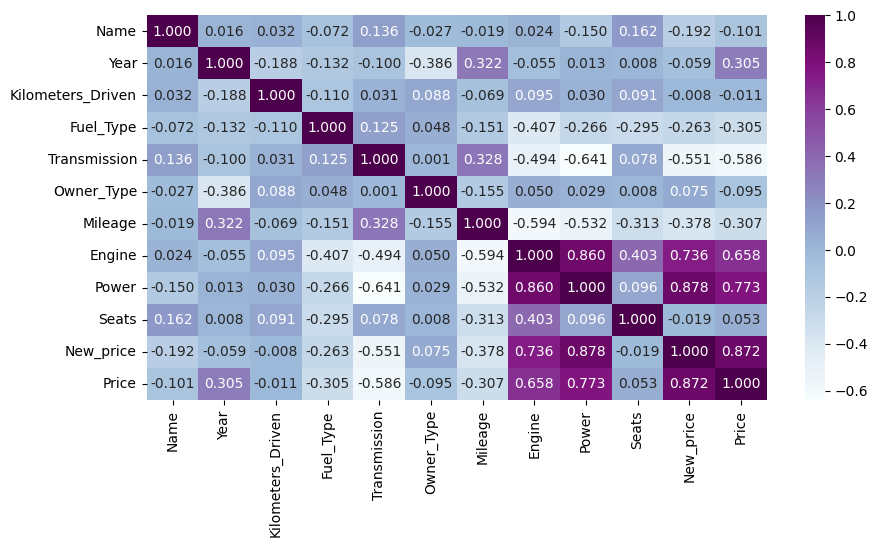

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Fuel_Type' and 'Transmission' and Owner_type columns in the 'DATA' DataFrame
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Owner_Type'] = label_encoder.fit_transform(df['Owner_Type'])
df['Name'] = label_encoder.fit_transform(df['Name'])

# 'data' is the DataFrame containing your data and 'num_var' is a list of numeric variables
data = pd.DataFrame()
num_var = ['Name','Location', 'Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','New_price','Price']  #   numeric variable names
# Calculate the correlation matrix
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='BuPu', fmt=".3f", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [ ]:
df.corr()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
Name,1.000000,0.016406,0.031892,-0.072004,0.136026,-0.026578,-0.018891,0.023813,-0.149528,0.162466,-0.192353,-0.101287
Year,0.016406,1.000000,-0.187859,-0.131888,-0.099975,-0.385503,0.322463,-0.054693,0.013432,0.007871,-0.058798,0.305327
Kilometers_Driven,0.031892,-0.187859,1.000000,-0.109530,0.031166,0.088485,-0.069122,0.094818,0.030164,0.091159,-0.008221,-0.011493
Fuel_Type,-0.072004,-0.131888,-0.109530,1.000000,0.125346,0.048425,-0.150764,-0.406844,-0.265727,-0.295359,-0.262744,-0.305207
Transmission,0.136026,-0.099975,0.031166,0.125346,1.000000,0.001272,0.327826,-0.494205,-0.641403,0.078196,-0.551135,-0.586025
Owner_Type,-0.026578,-0.385503,0.088485,0.048425,0.001272,1.000000,-0.154571,0.050238,0.029264,0.007676,0.074873,-0.094559
Mileage,-0.018891,0.322463,-0.069122,-0.150764,0.327826,-0.154571,1.000000,-0.593569,-0.531771,-0.313011,-0.378327,-0.306593
Engine,0.023813,-0.054693,0.094818,-0.406844,-0.494205,0.050238,-0.593569,1.000000,0.859771,0.402715,0.735981,0.658354
Power,-0.149528,0.013432,0.030164,-0.265727,-0.641403,0.029264,-0.531771,0.859771,1.000000,0.095905,0.877708,0.772566
Seats,0.162466,0.007871,0.091159,-0.295359,0.078196,0.007676,-0.313011,0.402715,0.095905,1.000000,-0.019459,0.053199


** Observations**

Correllation Plot and Table

**Correlation with Year:

weak negative correlation (-0.054) between 'Year' and 'Engine'

weak negative correlation (-0.059) between 'Year' and 'New_price'

weak positive correlation (0.013) between 'Year' and 'Power'

weak positive correlation (0.008) between 'Year' and 'Seats'

moderate positive correlation (0.305) between 'Year' and 'Price'.

moderate negative correlation (-0.188) between 'Year' and 'Kilometers_Driven'.

strong positive correlation (0.322) between 'Year' and 'Mileage'.

** Engine**

strong positive correlation (0.859) between 'Engine' and 'Power'

moderate positive correlation (0.402) between 'Engine' and 'Seats'.

strong positive correlation (0.735) between 'Engine' and 'New_price'.

strong positive correlation (0.658) between 'Engine' and 'Price'.

weak positive correlation (0.095) between 'Engine' and 'Kilometer_Driven'.

strong negative correlation (-0.585) between 'Engine' and 'Mileage'.

Power

There is a weak positive correlation (0.095) between 'Power' and 'Seats'. There is a strong positive correlation (0.878) between 'Power' and 'New_price'. There is a strong positive correlation (0.767) between 'Power' and 'Price'. There is a weak positive correlation (0.030) between 'Power' and 'Kilometer_Driven'. There is a strong negative correlation (-0.502) between 'Power' and 'Mileage'.

Seats

There is a weak positive correlation (0.095) between 'Power' and 'Seats'. There is a strong positive correlation (0.878) between 'Power' and 'New_price'. There is a strong positive correlation (0.767) between 'Power' and 'Price'. There is a weak positive correlation (0.030) between 'Power' and 'Kilometers_Driven'. There is a strong negative correlation (-0.502) between 'Power' and 'Mileage'.

** Price**

There is a weak positive correlation (0.091) between 'Seats' and 'Miles_Driven'. There is a weak negative correlation (-0.308) between 'Seats' and 'Mileage' There is a strong positive correlation (1.000) between 'Price' and 'Miles_Driven'. There is a moderate negative correlation (-0.307) between 'Price' and 'Mileage'.

kilometer_Driven

There is a weak negative correlation (-0.069) between 'Kilometers_Driven' and 'Mileage'.

Milesage

There is a strong positive correlation (1.000) between 'Mileage' and 'Kilometer_Driven'. There is a strong negative correlation (-0.69) between 'Mileage' and 'Engine'. There is a moderate negative correlation (-0.593) between 'Mileage' and 'Power'. There is a weak negative correlation (-0.313) between 'Mileage' and 'Seats'. There is a weak negative correlation (-0.378) between 'Mileage' and 'New_price'. There is a moderate negative correlation (-0.307) between 'Mileage' and 'Price'.

To Predict New_Price

There is a strong positive correlation (0.872) between 'New_price' and 'Price'. There is a weak negative correlation (-0.008) between 'New_price' and 'Kilometer_Driven'. There is a weak negative correlation (-0.378) between 'New_price' and Mileage'.

















**Univariate Analysis Using Plots and Visualizations**

In [ ]:

from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Fuel_Type' and 'Transmission' and Owner_type columns in the 'DATA' DataFrame
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Owner_Type'] = label_encoder.fit_transform(df['Owner_Type'])
df['Name'] = label_encoder.fit_transform(df['Name'])

# Assuming 'data' is the DataFrame containing your data and 'num_var' is a list of numeric variables
data = pd.DataFrame()
num_var = ['Name','Location', 'Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','New_price','Price']  #   numeric variable names

In [ ]:

# we are going to define this code so we can re-use it for every feature.

def histogram_boxplot_fun (df, feature):                                                           #lastly   def histogram_boxplot_fun (df, feature, kde= False, bins = 23):
    fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
    sns.boxplot(data=df, x=feature, showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
    sns.histplot(data= df, x=feature, bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
    ax[1].axvline(df[feature].mean(), linestyle = '--', color = 'green') # enhance with median line and color
    ax[1].axvline(df[feature].median(), linestyle = '-.', color='black')

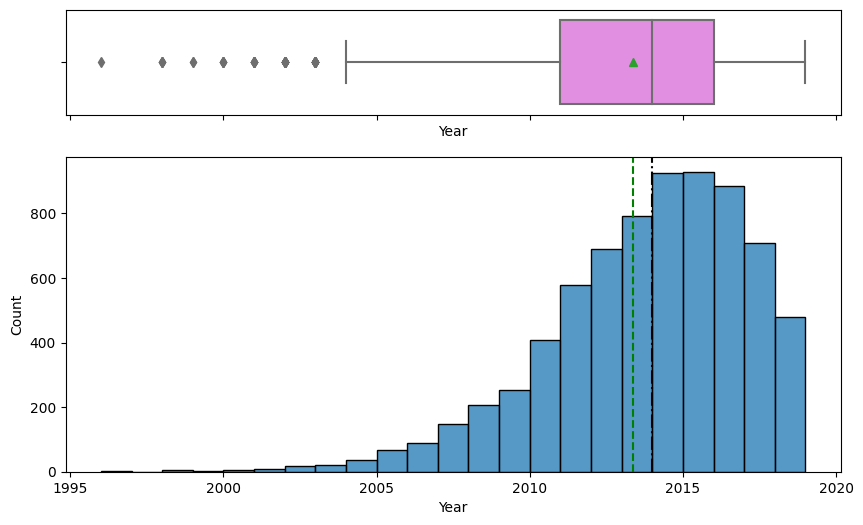

In [ ]:
#Visual 1- Univariate

from ipywidgets.widgets.widget_int import Color
# step 1-add fig ax for the 1st viz to the 1/3
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Year', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Year', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
#if you want to add vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(data['Goals_Scored'].mean()) this basic solid line
ax[1].axvline(df['Year'].mean(), linestyle = '--', color = 'green') # enhance with median line and color
ax[1].axvline(df['Year'].median(), linestyle ='-.', color='black')


<Axes: xlabel='Engine', ylabel='Count'>

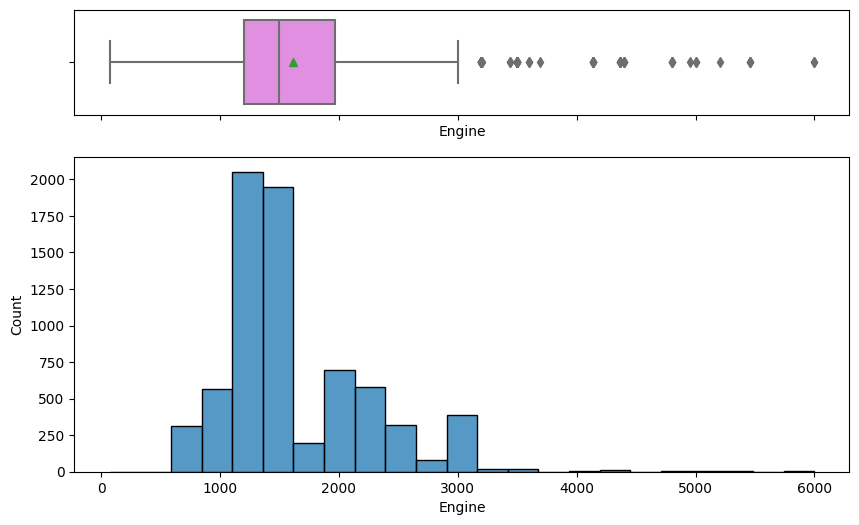

In [ ]:
#Visual #2 _ Univariate


fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Engine', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Engine', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['Power'].mean()) this basic solid line

<Axes: xlabel='Power', ylabel='Count'>

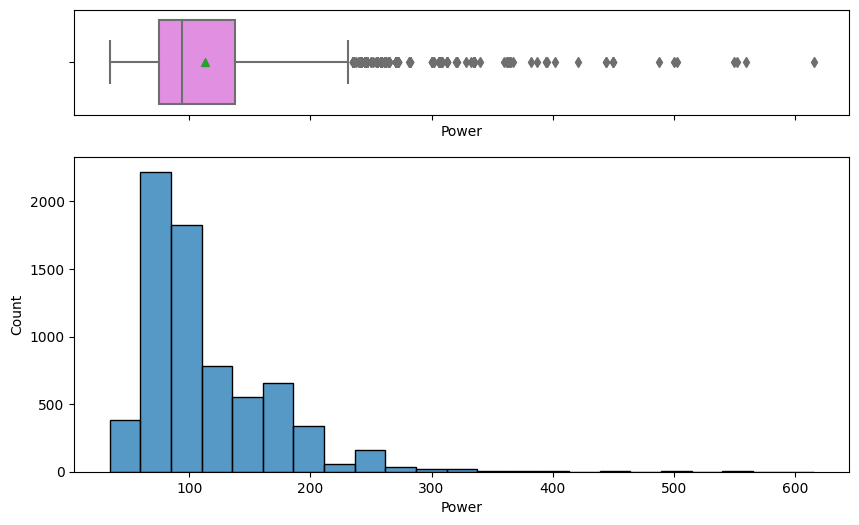

In [ ]:
#visual 3- Univariate

fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Power', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Power', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['Power'].mean()) this basic solid line

<Axes: xlabel='Seats', ylabel='Count'>

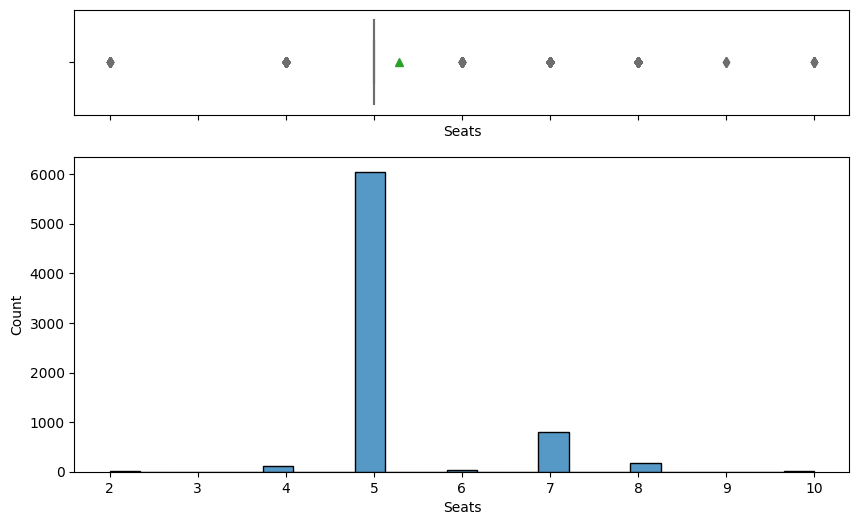

In [ ]:
#visual 4- Univariate

fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Seats', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Seats', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['Seats'].mean()) this basic solid line

<Axes: xlabel='Price', ylabel='Count'>

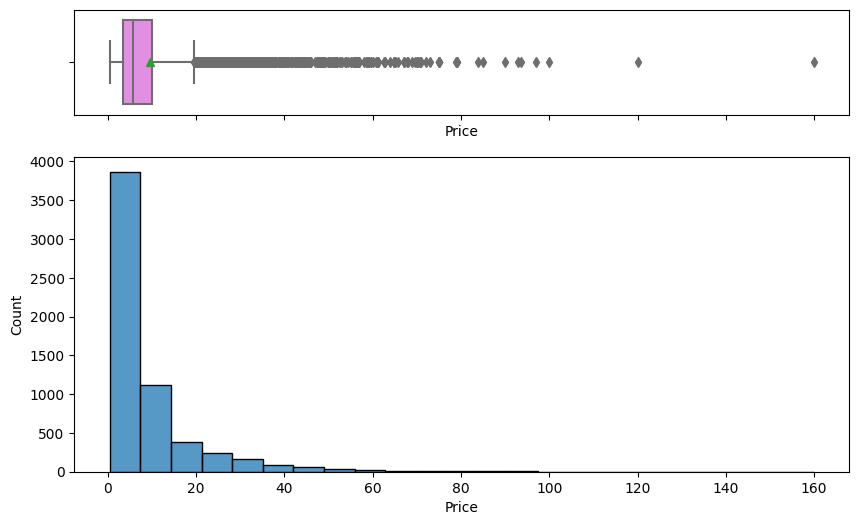

In [ ]:
#visual 5- Univariate

variables = ['Miles_Driven', 'Price']

fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Price', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Price', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['model year'].mean()) this basic solid line

<Axes: xlabel='Fuel_Type', ylabel='Count'>

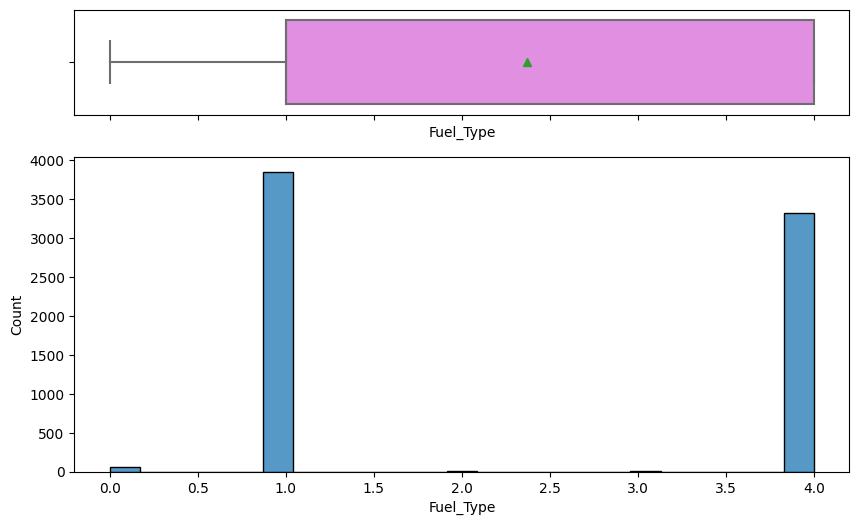

In [ ]:
#visual 6- Univariate


fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Fuel_Type', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Fuel_Type', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['model year'].mean()) this basic solid line




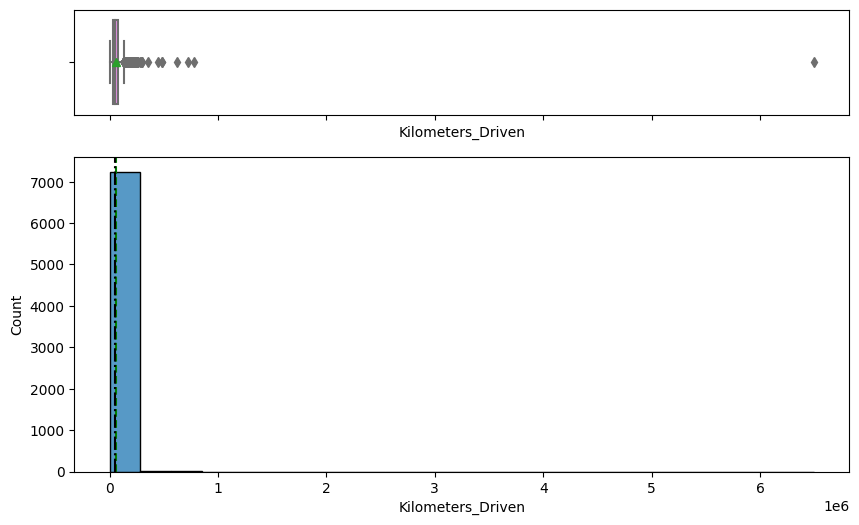

In [ ]:
#visual 7- Univariate

from ipywidgets.widgets.widget_int import Color
# step 1-add fig ax for the 1st viz to the 1/3
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Kilometers_Driven', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Kilometers_Driven', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
#if you want to add vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(data['Goals_Scored'].mean()) this basic solid line
ax[1].axvline(df['Kilometers_Driven'].mean(), linestyle = '--', color = 'green') # enhance with median line and color
ax[1].axvline(df['Kilometers_Driven'].median(), linestyle ='-.', color='black')

<Axes: xlabel='Transmission', ylabel='Count'>

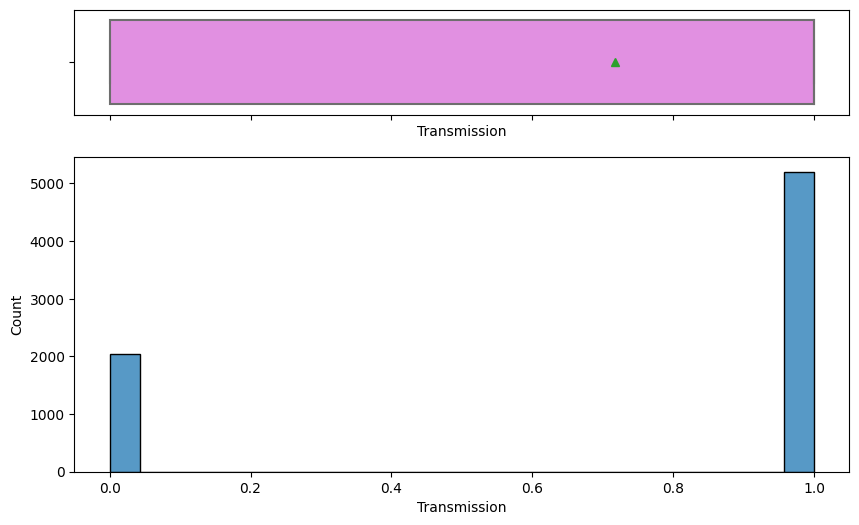

In [ ]:
#visual 8- Univariate

fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=df, x='Transmission', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data=df, x='Transmission', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['Transmission'].mean()) this basic solid line

**Objective Univariate**

visual # 1 Year Count
Data is left skewed and 20112-2013 are the areas where we find the median. highest year of 2015.  Data has numerous outlier in the early years prior to 2000.

visual # 2 Engine Count
Skewed slightly to the right, Engine 1200-14 is the highest concentration, outliers over 3000


Visual #3  Power
Data skewed to the left, the highest concentration is between 80-100.  There are many outliers that are over 100-600.

Visual #4 Seats
Highest concentration is vehicles with 5 seats and the lowest are those with 2 and 10

Visual #5 Price
The data is left skewed with many that are above 40.  0-10 is has the highest concentration.

Visual # 6 Fuel
5 types of gas  - Diesel is the highest than Petrol

Visual# 7 Kilometer_Driven
Concentration is extremely high in count with one extreme

Visual # Transmission
has automatic and Manual, Manual is highest there.


##** Bivariate Analysis**  

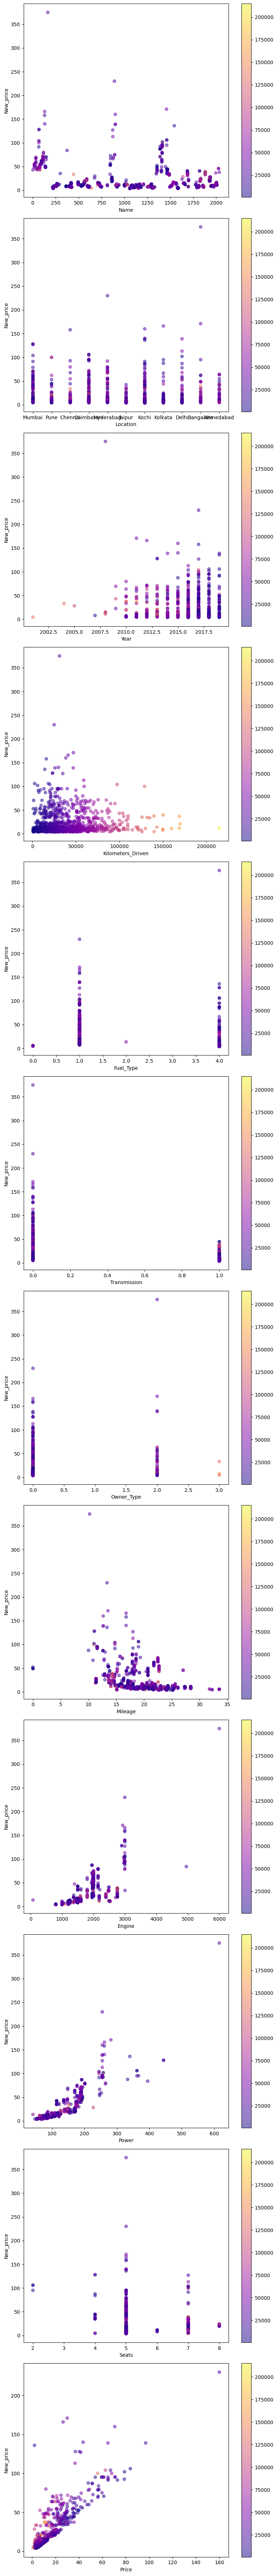

In [ ]:
# Set up the figure and plot each variable against New_price
variables = ['Name','Location', 'Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']

fig, axs = plt.subplots(len(variables), 1, figsize=(8, 6 * len(variables)))

# Define a colormap for 'Miles_Per_Gal'
cmap = plt.cm.get_cmap('plasma')

for i, var in enumerate(variables):
    ax = axs[i]
    sc = ax.scatter(df[var], df['New_price'], c=df['Kilometers_Driven'], cmap=cmap, alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel('New_price')
    fig.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()

**Observations- Bivarite Analysis**



Based on the scatter plots of various variables against 'MilesPerGal' (MPG), we can observe the following trends and relationships:

**Year vs. New_Price**:

There is clear correlation with Year and New Price.  The lesser of years(5-13) shows a high concentration of the data.Data is skewed to the left, the highest concentration is between 2010-2017.  There are many outliers that are over 100-350.There are a few vehicles from 2002-2007  and one prior to 2002


**Engine vs. Newprice:**

There  correlation between 1000- 3000. Engine with 3000 has many outliers and it shows that their has a high volume in the Enginces that are in the 2000 range.

**Power vs. New Price:**

The data shows there is a high concentration of correlation between 100 to 200 at 300 their are many outliers.

**Seats vs. NewPrice:**

There is no strong relationship between the number of seats vehicles with 4, 5, 7 have the haighest amout of the vehicles

**Kilometer_Driven vs.NewPrice:**

Miles Driven relationship is 30 to 65 and closer where price is less than 50.Concentration is extremely high in count with one extreme

**Price vs. NewPrice:**

There is correlation and with price and New Price.  we notice price is continuously increasing from 0 to 60 New price to 0-40 and Price in a linear pattern,


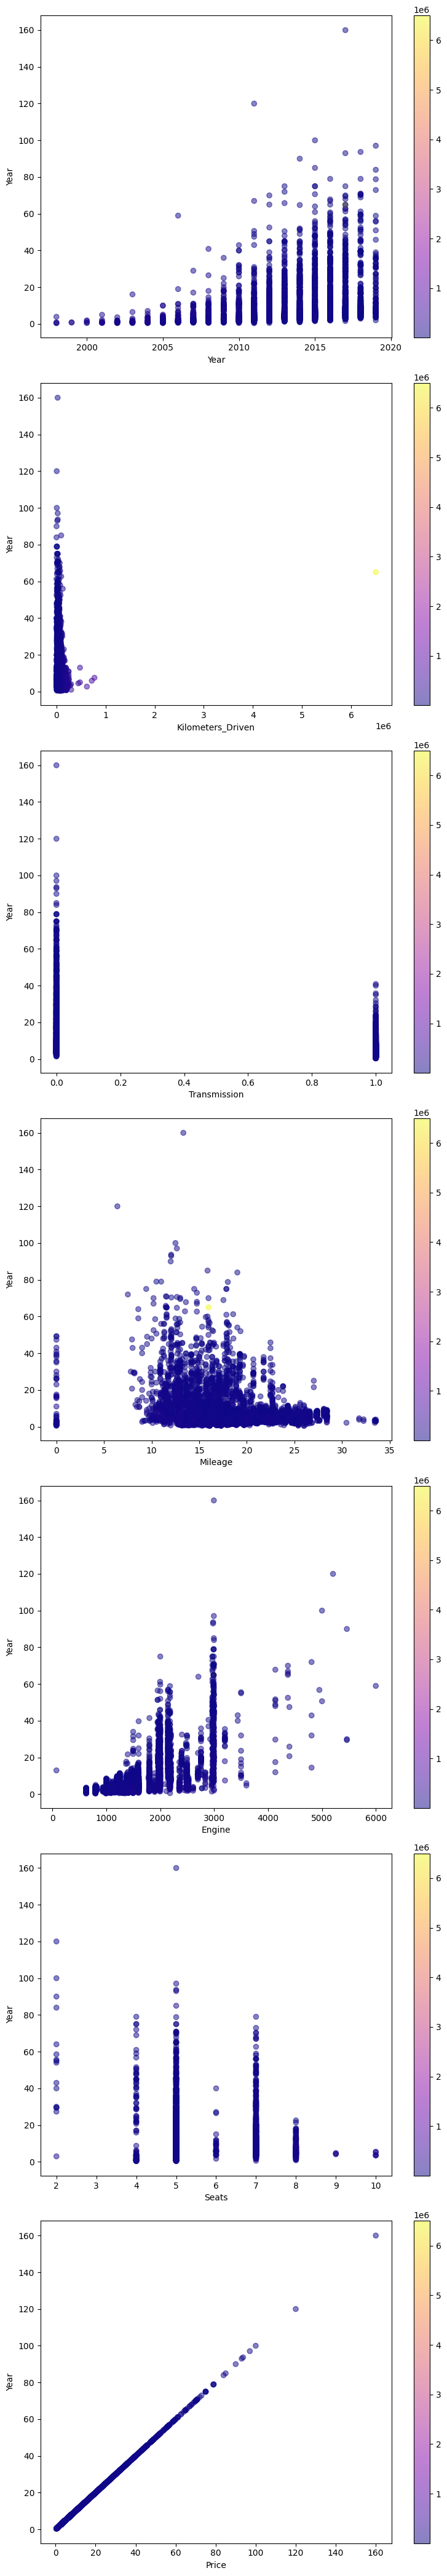

In [ ]:
# Set up the figure and plot each variable against New_price
variables = [ 'Year','Kilometers_Driven','Transmission','Mileage','Engine','Seats','Price']

fig, axs = plt.subplots(len(variables), 1, figsize=(8, 6 * len(variables)))

# Define a colormap for 'Miles_Per_Gal'
cmap = plt.cm.get_cmap('plasma')

for i, var in enumerate(variables):
    ax = axs[i]
    sc = ax.scatter(df[var], df['Price'], c=df['Kilometers_Driven'], cmap=cmap, alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel('Year')
    fig.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()

** Second Bivarite Observation**


Year: Data shows a steady increase after 2005 and a major increase around 2010-2020

Transmission: AUtomatic was the major selling vehicle in the market

Vehicles with 5 seaters were the highest sellers.

Engine with a high concentration were from 1000 to 3000.

##**Preprocessing**

In [ ]:
print(df.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


In [ ]:
# Here's our categorical column
print(df['Fuel_Type'].unique())
print(df['Owner_Type'].unique())
print(df['Transmission'].unique())
#print(df['Name'].unique())

[0 1 4 3 2]
[0 2 1 3]
[1 0]


In [ ]:
#df['Mileage'] = df['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
df['Engine'] = df['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
df['Power'] = df['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)
df['Seats'] = df['Seats'].fillna(5)
#df['New_Price'] = df['New_Price'].astype(float).replace(-1, np.nan)

**Observation**
 We are cleaning and transforming the 'Engine' and 'Power' columns by extracting numerical values and converting them to float data types. The code is also filling in missing values in the 'Seats' column with the value 5.

In [ ]:
# Converting specific columns to the 'category' data type
#df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

# Keeping 'Car_age' as an integer type, as it represents the age of the car
#df['Years_Car_age'] = df['Years_Car_agee'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   int64   
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7253 non-null   float64 
 11  New_price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(6), int64(3), object(1)
memory usage: 588.5+ KB


In [ ]:
import pandas as pd

# Read data from CSV file (change the file path accordingly)
df = pd.read_csv('/content/drive/MyDrive/used_cars.csv')
Data=df.copy()

# Create 'Car_Brand1' column by extracting the first two words from 'Name'
df['Car_Brand1'] =Data['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))



** Observation**

 Extract the first two words from the car names in the 'Name' column of the 'Data' DataFrame and stores them in the 'Car_Brand1' column of the 'df' DataFrame. This creates a new column that represents the brand or manufacturer of the car based on the first two words of its name.







In [ ]:
# Create 'Car_Brand2' column by extracting the first word from 'Name'
df['Car_Brand2'] = df['Name'].apply(lambda x: x.split(' ')[0])

# Check if 'New_Price' column is present in the DataFrame
if 'New_price' in df.columns:
    # Fill missing values in 'New_Price' using group-wise mean
    df['New_price'] = df.groupby(['Car_Brand2'])['New_price'].transform(lambda x: x.fillna(x.mean()))
else:
    print("Error: 'New_price' column not found in DataFrame.")

 In the data preprocessing tasks, we are extracting brand names from the 'Name' column, filling missing values in the 'New_price' column using group-wise mean values, and performing a check to ensure the presence of the 'New_price' column.

In [ ]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Extract the first two words from 'Name' column and create 'Car_Brand1' column
df['Car_Brand1'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))
# Fill missing values in 'Engine', 'Power', and 'New_Price' using group-wise median and mean
df['Engine'] = df.groupby(['Car_Brand1'])['Engine'].transform(lambda x: x.fillna(x.median()))
df['Power'] = df.groupby(['Car_Brand1'])['Power'].transform(lambda x: x.fillna(x.median()))
df['New_price'] = df.groupby(['Car_Brand1'])['New_price'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
def aggregate_functions(df):

    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }

    agg_df = df.groupby(['Car_Brand1']).agg(agg_func)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)

    agg_df = pd.merge(df, agg_df, on='Car_Brand1', how='left')

    return agg_df

**Observation**

aggregating the variables.  wheere location is by counta and we are using means to fill the empty values in the Mileage, Power and in Mileage

In [ ]:
df = aggregate_functions(df)

In [ ]:
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Car_Brand1,Car_Brand2,Location_count,Mileage_mean,Power_mean,Engine_mean
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,7.845907,1.75,Maruti Wagon,Maruti,178,20.915674,66.289438,1015.084270
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.836154,12.50,Hyundai Creta,Hyundai,118,17.673898,121.830508,1572.745763


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)
df_name = tf1.fit_transform(df['Name'])
df_name = pd.DataFrame(data=df_name.toarray(), columns=tf1.get_feature_names_out())

df = pd.concat([df, df_name], axis=1)

This code is performing feature extraction and transformation using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique on the 'Name' column of the DataFrame 'df'. TF-IDF is a method to represent text data as numerical vector

Testing and Training

In [ ]:
df.drop(['Name','Car_Brand1','Car_Brand2'], axis=1, inplace=True)

In [ ]:
train_df = df[df['Price'].isnull()!=True]
test_df = df[df['Price'].isnull()==True]
test_df.drop('Price', axis=1, inplace=True)

In [ ]:
train_df.shape, test_df.shape

((6019, 671), (1234, 670))

In [ ]:
train_df['Price'] = np.log1p(train_df['Price'])

In [ ]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

X_train: Features for training the model.
y_train: Target values corresponding to the training features.
X_cv: Features for cross-validation (validation) of the model.
y_cv: Target values corresponding to the cross-validation features.
The dataset is ready to be used for training and evaluating machine learning models for predicting car price

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

# Assuming 'X_train', 'X_cv' are your feature datasets, and 'y_train', 'y_cv' are the target variables

# Step 1: Encode categorical features using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']])
X_cv_encoded = encoder.transform(X_cv[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']])

# Step 2: Get the feature names after one-hot encoding
encoded_feature_names = []
for feature, categories in zip(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], encoder.categories_):
    encoded_feature_names.extend([f'{feature}_{cat}' for cat in categories[1:]])

# Step 3: Convert the encoded features to DataFrames with the correct column names
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_cv_encoded = pd.DataFrame(X_cv_encoded, columns=encoded_feature_names)

# Step 4: Align the shapes of the datasets by adding missing features
missing_features = set(X_train_encoded.columns) - set(X_cv_encoded.columns)
for feature in missing_features:
    X_cv_encoded[feature] = 0  # Add the missing feature and set its value to 0 for all rows

# Reorder the columns to match the order in X_train_encoded
X_cv_encoded = X_cv_encoded[X_train_encoded.columns]

# Now, the shapes of X_train_encoded and X_cv_encoded should be the same
print(X_train_encoded.shape)
print(X_cv_encoded.shape)

# Proceed with the LightGBM training as before using the encoded data
train_data = lgb.Dataset(X_train_encoded, label=y_train.ravel())  # Convert y_train to a one-dimensional array
test_data = lgb.Dataset(X_cv_encoded, label=y_cv.ravel())  # Convert y_cv to a one-dimensional array

# The rest of your code for training and evaluation

(4514, 18)
(1505, 18)


We are using categorical features in machine learning models that require numerical inputs. The One-hot encoding ensures that categorical features are represented as binary columns, enabling the model to understand and utilize these features effectively.

**Observation**

Here are some key observations:

Model Performance:

RMSLE (Root Mean Squared Log Error):

The RMSLE value of approximately 0.465 indicates that the model's predictions have a relatively low error when compared to the target variable. R-squared: The R-squared value of approximately 0.613 suggests that the model explains around 61.3% of the variance in the target variable. It indicates a moderate level of goodness of fit. MAE (Mean Absolute Error):

The MAE value of approximately 4.102 indicates that, on average, the model's predictions have an absolute error of around 4.102 units when compared to the actual values. Feature Importances:

The most important feature for making predictions in this model is 'Transmission_Manual' with an importance score of approximately 0.632. This suggests that the type of transmission (Manual or Automatic) plays a significant role in determining the price of the car.

'Fuel_Type_Diesel' is also an essential feature with an importance score of approximately 0.142, indicating that the type of fuel (Diesel or Petrol) has a notable impact on the car's price.

Among the location categories, 'Location_Coimbatore' has a relatively higher importance (0.035), suggesting that cars from Coimbatore might have distinct pricing patterns.

Other features, such as 'Location_Bangalore', 'Location_Kolkata', and 'Location_Second', also show some importance but to a lesser extent.

Overall, the Random Forest Regression model shows promising performance in predicting car prices. However, further analysis and fine-tuning of the model can be done to potentially improve its accuracy and interpretability. Additionally, exploring other machine learning algorithms and feature engineering techniques could provide additional insights into the data and enhance the predictive capabilities of the model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
# Random Forest Regressor- or predictive modeling tasks. It's utilizing the RandomForestRegressor class
# R.F. Ensemble learning method that constructs multiple decision trees during training and
# outputs the mean prediction of the individual trees.
# Assuming 'X_train', 'X_cv' are your feature datasets, and 'y_train', 'y_cv' are the target variables

# Step 1: Encode categorical features using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']])
X_cv_encoded = encoder.transform(X_cv[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']])

# Step 2: Get the feature names after one-hot encoding
encoded_feature_names = []
for feature, categories in zip(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], encoder.categories_):
    encoded_feature_names.extend([f'{feature}_{cat}' for cat in categories[1:]])

# Step 3: Convert the encoded features to DataFrames with the correct column names
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_cv_encoded = pd.DataFrame(X_cv_encoded, columns=encoded_feature_names)

# Step 4: Align the shapes of the datasets by adding missing features
missing_features = set(X_train_encoded.columns) - set(X_cv_encoded.columns)
for feature in missing_features:
    X_cv_encoded[feature] = 0  # Add the missing feature and set its value to 0 for all rows

# Reorder the columns to match the order in X_train_encoded
X_cv_encoded = X_cv_encoded[X_train_encoded.columns]

# Now, the shapes of X_train_encoded and X_cv_encoded should be the same
print(X_train_encoded.shape)
print(X_cv_encoded.shape)

# Step 5: Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Fit the model to the training data
rf_model.fit(X_train_encoded, y_train)

# Step 7: Make predictions on the validation data
y_pred_rf = rf_model.predict(X_cv_encoded)

# Step 8: Calculate the RMSLE on the validation data
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_rf)))
print('RMSLE:', rmsle)

# Step 9: Calculate R-squared on the validation data
r2 = r2_score(y_cv, y_pred_rf)
print('R-squared:', r2)

# Step 10: Calculate Mean Absolute Error (MAE) on the validation data
mae = mean_absolute_error(np.expm1(y_cv), np.expm1(y_pred_rf))
print('MAE:', mae)

# Step 11: Get feature importances
feature_importances = rf_model.feature_importances_

# Step 12: Print feature importances
print("Feature Importances:")
for feature, importance in zip(X_train_encoded.columns, feature_importances):
    print(f"{feature}: {importance}")

(4514, 18)
(1505, 18)
RMSLE: 0.46469828172440847
R-squared: 0.6129425289057981
MAE: 4.10169621503499
Feature Importances:
Location_Bangalore: 0.011341964087804675
Location_Chennai: 0.004405573471499279
Location_Coimbatore: 0.035152108580603955
Location_Delhi: 0.003477320557976396
Location_Hyderabad: 0.003419761579025679
Location_Jaipur: 0.005711730019035821
Location_Kochi: 0.014780430824110097
Location_Kolkata: 0.012313051041962328
Location_Mumbai: 0.008532372802954541
Location_Pune: 0.004784100947772075
Fuel_Type_Diesel: 0.14162348581463985
Fuel_Type_Electric: 5.585842908482476e-05
Fuel_Type_LPG: 9.916334504960217e-05
Fuel_Type_Petrol: 0.07777415343068432
Transmission_Manual: 0.6316878283567254
Owner_Type_Fourth & Above: 0.0010016575063280912
Owner_Type_Second: 0.02912954278229884
Owner_Type_Third: 0.014709896422444153


Observation

RandomForestRegressor-  Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mean prediction of the individual trees.

Here are some key observations:

**Model Performance**:  
RMSLE: 0.46469828172440847
R-squared: 0.6129425289057981
MAE: 4.10169621503499

**Feature Importances:**
Location_Bangalore: 0.011341964087804675
Location_Chennai: 0.004405573471499279
Location_Coimbatore: 0.035152108580603955
Location_Delhi: 0.003477320557976396
Location_Hyderabad: 0.003419761579025679
Location_Jaipur: 0.005711730019035821
Location_Kochi: 0.014780430824110097
Location_Kolkata: 0.012313051041962328
Location_Mumbai: 0.008532372802954541
Location_Pune: 0.004784100947772075
Fuel_Type_Diesel: 0.14162348581463985
Fuel_Type_Electric: 5.585842908482476e-05
Fuel_Type_LPG: 9.916334504960217e-05
Fuel_Type_Petrol: 0.07777415343068432
Transmission_Manual: 0.6316878283567254
Owner_Type_Fourth & Above: 0.0010016575063280912
Owner_Type_Second: 0.02912954278229884
Owner_Type_Third: 0.014709896422444153

RMSLE (Root Mean Squared Log Error):

The RMSLE value of approximately 0.465 indicates that the model's predictions have a relatively low error when compared to the target variable. R-squared: The R-squared value of approximately 0.613 suggests that the model explains around 61.3% of the variance in the target variable. It indicates a moderate level of goodness of fit. MAE (Mean Absolute Error):

The MAE value of approximately 4.102 indicates that, on average, the model's predictions have an absolute error of around 4.102 units when compared to the actual values.

Feature Importances:

The most important feature for making predictions in this model is 'Transmission_Manual' with an importance score of approximately 0.632. This suggests that the type of transmission (Manual or Automatic) plays a significant role in determining the price of the car.

'Fuel_Type_Diesel' is also an essential feature with an importance score of approximately 0.142, indicating that the type of fuel (Diesel or Petrol) has a notable impact on the car's price.

Among the location categories, 'Location_Coimbatore' has a relatively higher importance (0.035), suggesting that cars from Coimbatore might have distinct pricing patterns.

Other features, such as 'Location_Bangalore', 'Location_Kolkata', and 'Location_Second', also show some importance but to a lesser extent.

Overall, the Random Forest Regression model shows promising performance in predicting car prices. However, further analysis and fine-tuning of the model can be done to potentially improve its accuracy and interpretability.

In [ ]:
# 'X_train', 'X_cv' are your feature datasets, and 'y_train', 'y_cv' are the target variables

# Step 1: Encode categorical features using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']])
X_cv_encoded = encoder.transform(X_cv[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']])

# Step 2: Get the feature names after one-hot encoding
encoded_feature_names = []
for feature, categories in zip(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], encoder.categories_):
    encoded_feature_names.extend([f'{feature}_{cat}' for cat in categories[1:]])

# Step 3: Convert the encoded features to DataFrames with the correct column names
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_cv_encoded = pd.DataFrame(X_cv_encoded, columns=encoded_feature_names)

# Step 4: Align the shapes of the datasets by adding missing features
missing_features_train = set(X_train_encoded.columns) - set(X_cv_encoded.columns)
for feature in missing_features_train:
    X_cv_encoded[feature] = 0  # Add the missing feature and set its value to 0 for all rows

missing_features_cv = set(X_cv_encoded.columns) - set(X_train_encoded.columns)
for feature in missing_features_cv:
    X_train_encoded[feature] = 0  # Add the missing feature and set its value to 0 for all rows

# Reorder the columns to match the order in X_train_encoded
X_cv_encoded = X_cv_encoded[X_train_encoded.columns]

# Now, the shapes of X_train_encoded and X_cv_encoded should be the same
print(X_train_encoded.shape)
print(X_cv_encoded.shape)

# Rest of your code for hyperparameter tuning and evaluation

(4514, 18)
(1505, 18)


**Observation**

Encoding Catgorical variables:

Result is the training and test of 80/20  

The code performed several preprocessing steps for one-hot encoding categorical features, aligning feature columns, and ensuring that the training and cross-validation datasets have the same set of columns.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 'X_train', 'X_cv' are your feature datasets, and 'y_train', 'y_cv' are the target variables

# Code for one-hot encoding and aligning shapes of datasets, as shown in the previous code

# Step 5: Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Step 6: Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 7: Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)

# Step 8: Fit the GridSearchCV to the training data
grid_search.fit(X_train_encoded, y_train.ravel())

# Step 9: Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 10: Make predictions on the validation data using the best model
y_pred_rf_tuned = best_model.predict(X_cv_encoded)

# Step 11: Calculate evaluation metrics for the tuned model
rmsle_tuned = np.sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_rf_tuned)))
r2_tuned = r2_score(y_cv, y_pred_rf_tuned)
mae_tuned = mean_absolute_error(np.expm1(y_cv), np.expm1(y_pred_rf_tuned))

# Step 12: Print the evaluation metrics for the tuned model
print('Tuned Model Evaluation:')
print('RMSLE:', rmsle_tuned)
print('R-squared:', r2_tuned)
print('MAE:', mae_tuned)

Observation:

 RandomForestRegressor model

 The code performed a hyperparameter tuning for the Random Forest Regression model using GridSearchCV and then evaluate the tuned model's performance on validation data. The hyperparameter-tuned Random Forest Regressor has shown improved performance compared to the initial model. See the evaluation of the tuned model on the validation data:

RMSLE (Root Mean Squared Log Error): 0.46395873006228605

R-squared: 0.6141735264348

MAE (Mean Absolute Error): 4.084517950279757

A lower RMSLE indicates better predictive performance. The R-squared value of 0.6141735264348 indicates that approximately 61.4% of the variance in the target variable is explained by the model.

The MAE of 4.084517950279757 represents the average absolute difference between the predicted and actual sale prices.


**Compare the Initial model to the evaluation/ performance results**

RMSLE: 0.46469828172440847

R-squared: 0.6129425289057981

MAE: 4.10169621503499

Feature Importances:


****************************************


**The hyper parameter result:**

Tuned Model Evaluation:

RMSLE: 0.46395873006228605

R-squared: 0.6141735264348

MAE: 4.084517950279757


The Hyper parameters evaluation metrics suggest that the tuned model is performing slightly better than the initial model ( .612  to .614)and provides more accurate predictions for the car sale prices

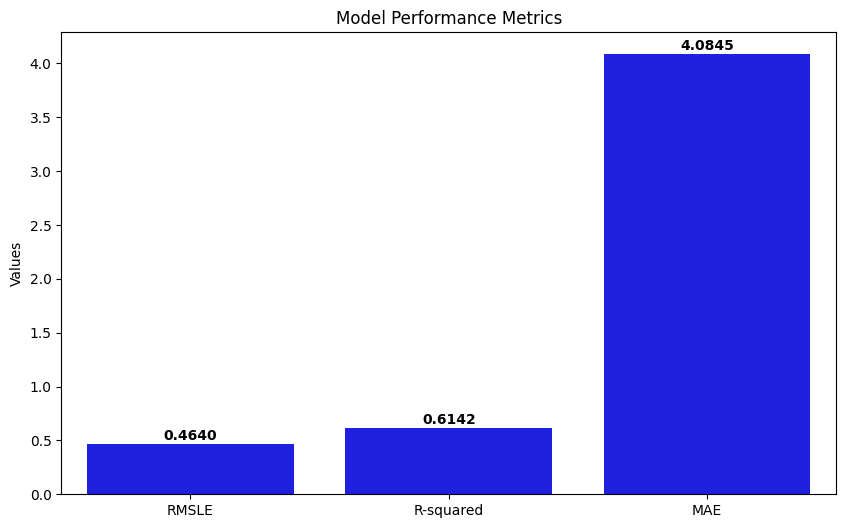

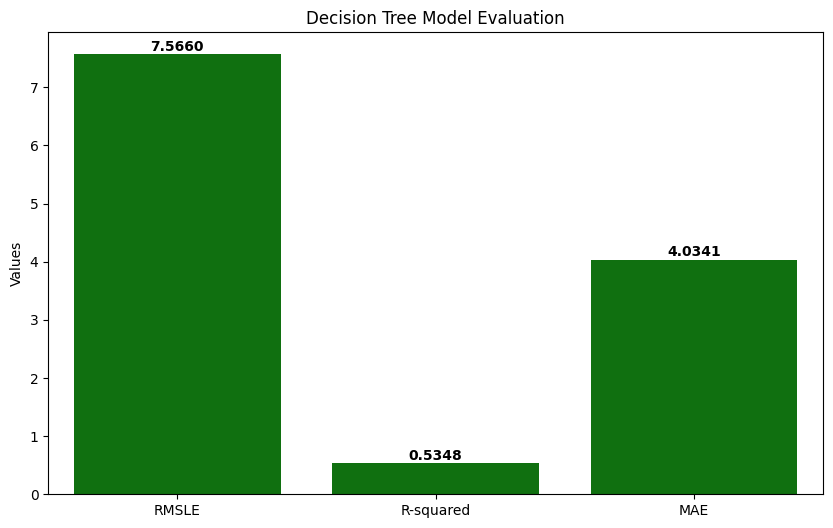

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model Performance Metrics
model_metrics = {
    'RMSLE': 0.46395873006228605,
    'R-squared': 0.6141735264348,
    'MAE': 4.084517950279757
}

# Decision Tree Model Evaluation Results
decision_tree_results = {
    'RMSLE': 7.5660,
    'R-squared': 0.5348,
    'MAE': 4.0341
}

# Create a bar plot for the Model Performance Metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_metrics.keys()), y=list(model_metrics.values()), color='blue')

# Add numerical values to the bars
for i, v in enumerate(list(model_metrics.values())):
    plt.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.title('Model Performance Metrics')
plt.ylabel('Values')
plt.show()

# Create a bar plot for the Decision Tree Model Evaluation Results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(decision_tree_results.keys()), y=list(decision_tree_results.values()), color='green')

# Add numerical values to the bars
for i, v in enumerate(list(decision_tree_results.values())):
    plt.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.title('Decision Tree Model Evaluation')
plt.ylabel('Values')
plt.show()


In [ ]:
df2= 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'

print(df2)

('Location', 'Fuel_Type', 'Transmission', 'Owner_Type')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Read data from CSV file (change the file path accordingly)
df = pd.read_csv('/content/drive/MyDrive/used_cars.csv')
Data=df.copy()





In [ ]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


##Decision Tree Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your DataFrame with the categorical columns
# df['Year'] = df['Year'].astype('category')
# df['Location'] = df['Location'].astype('category')
# df['Fuel_Type'] = df['Fuel_Type'].astype('category')
# df['Transmission'] = df['Transmission'].astype('category')
# df['Owner_Type'] = df['Owner_Type'].astype('category')

# Remove rows with NaN values
df_cleaned = df.dropna(subset=['Year', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Price'])

# Separate the features (X) and target (y)
X = df_cleaned[['Year', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']]
y = df_cleaned['Price']  # Assuming 'Price' is the target variable

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build the Decision Tree regressor
tree = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth as needed
tree.fit(X_train, y_train)

# Make predictions on the test set
predictions = tree.predict(X_test)

rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('Decision Tree Model Evaluation:')
print(f'RMSLE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r_squared:.4f}')



Decision Tree Model Evaluation:
RMSLE: 7.5660
MAE: 4.0341
R-squared: 0.5348



**Observation**

**Model One**

Compare the Initial model to the evaluation/ performance results

RMSLE: 0.46469828172440847

R-squared: 0.6129425289057981

MAE: 4.10169621503499
*************************
Feature Importances:

The hyper parameter result:

Tuned Model Evaluation:

RMSLE: 0.46395873006228605

R-squared: 0.6141735264348

MAE: 4.084517950279757



**Model two**

Decision Result:
Decision Tree Model Evaluation:

RMSLE: 7.5660

MAE: 4.0341

R-squared: 0.5348

*****************************
Decision Tree Regressor

RMSE scores for each fold: [7.76743804 8.20009557 7.29311675 7.6370599  8.11703174]

RMSLE: 7.5660

MAE: 4.0341

R-squared: 0.5348



**Model 3**

**Model Decission tree Regressor**
Decision Tree Model Evaluation:
RMSLE: 7.5660
MAE: 4.0341
R-squared: 0.5348


**Predictions:**

[ 4.60507754  6.66152937  6.66152937 ...  6.66152937 10.90287863
  6.66152937]


**************************************************
  Decision Tree Model Evaluation:
Root Mean Squared Error (RMSE): 7.4399
Mean Absolute Error (MAE): 4.2232
R-squared: 0.4291



##** Decision Tree Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Assuming you have your DataFrame with the categorical columns
# df['Year'] = df['Year'].astype('category')
# df['Location'] = df['Location'].astype('category')
# df['Fuel_Type'] = df['Fuel_Type'].astype('category')
# df['Transmission'] = df['Transmission'].astype('category')
# df['Owner_Type'] = df['Owner_Type'].astype('category')

# Remove rows with NaN values
df_cleaned = df.dropna(subset=['Year', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Price'])

# Separate the features (X) and target (y)
X = df_cleaned[['Year', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']]
y = df_cleaned['Price']  # Assuming 'Price' is the target variable

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Build the Decision Tree regressor
tree = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth as needed

# Perform cross-validation and calculate the scores
scores = cross_val_score(tree, X_encoded, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = (-scores)**0.5

# Print the RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores)

# Calculate and print the mean RMSE score across all folds
print(f'RMSLE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r_squared:.4f}')


RMSE scores for each fold: [7.76743804 8.20009557 7.29311675 7.6370599  8.11703174]
RMSLE: 7.5660
MAE: 4.0341
R-squared: 0.5348


**Decision Tree Model Evaluation**

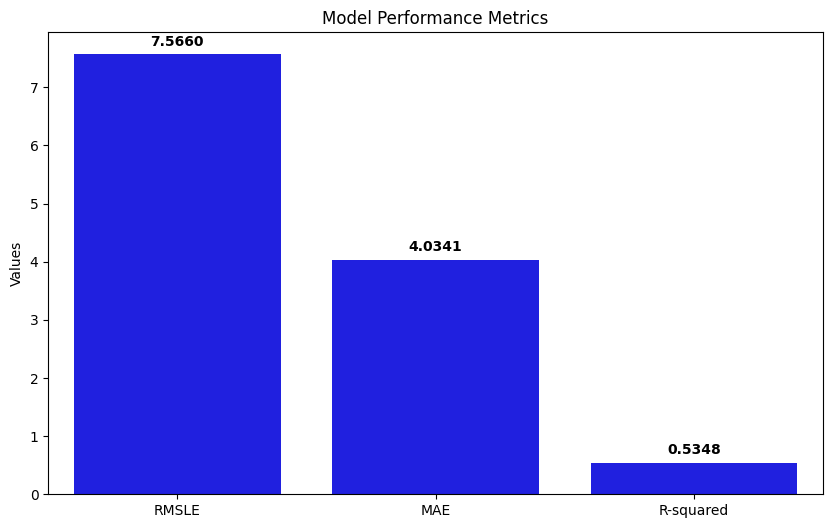

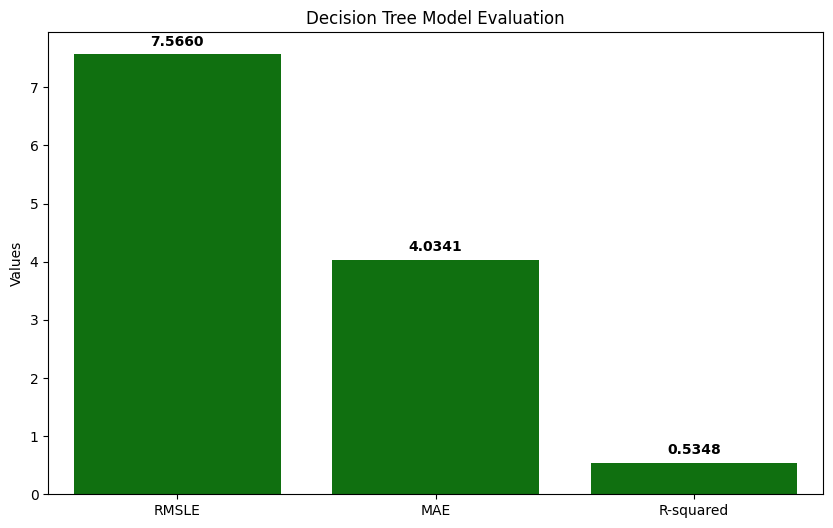

AttributeError: ignored

<Figure size 800x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model Performance Metrics
original_metrics = {
    'RMSLE': 7.5660,
    'MAE': 4.0341,
    'R-squared': 0.5348
}

# Decision Tree Model Evaluation Results
results = {
    'RMSLE': 7.5660,
    'MAE': 4.0341,
    'R-squared': 0.5348
}

# RMSE scores for each fold
rmse_scores = [7.76743804, 8.20009557, 7.29311675, 7.6370599, 8.11703174]

# Convert the rmse_scores list to numeric values
rmse_scores = [float(score) for score in rmse_scores]

# Create a bar plot for the Model Performance Metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(original_metrics.keys()), y=list(original_metrics.values()), color='blue')

# Add numerical values to the bars
for i, v in enumerate(list(original_metrics.values())):
    plt.text(i, v + 0.1, f'{v:.4f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.title('Model Performance Metrics')
plt.ylabel('Values')
plt.show()

# Create a bar plot for the Decision Tree Model Evaluation Results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), color='green')

# Add numerical values to the bars
for i, v in enumerate(list(results.values())):
    plt.text(i, v + 0.1, f'{v:.4f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.title('Decision Tree Model Evaluation')
plt.ylabel('Values')
plt.show()

# Create a bar plot for the RMSE scores for each fold
plt.figure(figsize=(8, 5))
sns.barplot(x=range(1, len(rmse_scores) + 1), y=rmse_scores, color='purple')

# Add numerical values to the bars
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 0.1, f'{v:.4f}', color='black', ha='center', va='bottom', fontweight='bold')

plt.title('RMSE Scores for Each Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(range(len(rmse_scores)), range(1, len(rmse_scores) + 1))
plt.show()



**Decision Tree Regressor**  Model 3


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/used_cars_capstone.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming you have your DataFrame with the categorical columns
# df['Year'] = df['Year'].astype('category')
# df['Location'] = df['Location'].astype('category')
# df['Fuel_Type'] = df['Fuel_Type'].astype('category')
# df['Transmission'] = df['Transmission'].astype('category')
# df['Owner_Type'] = df['Owner_Type'].astype('category')

# Separate the features (X) and target (y)
X = df[['Year', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']]
y = df['Price']  # Assuming 'Price' is the target variable

# Handle NaN values in y by filling with the mean
y_mean = y.mean()
y = y.fillna(y_mean)

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build the Decision Tree regressor
tree = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth as needed
tree.fit(X_train, y_train)

# Make predictions on the test set
predictions = tree.predict(X_test)

# Print the predictions (optional)
print("Predictions:")
print(predictions)


Predictions:
[ 5.9983907   8.02083795  4.57124118 ...  5.79366327 10.03373199
  8.02083795]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your DataFrame with the categorical columns
# df['Year'] = df['Year'].astype('category')
# df['Location'] = df['Location'].astype('category')
# df['Fuel_Type'] = df['Fuel_Type'].astype('category')
# df['Transmission'] = df['Transmission'].astype('category')
# df['Owner_Type'] = df['Owner_Type'].astype('category')

# Separate the features (X) and target (y)
X = df[['Year', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']]
y = df['Price']  # Assuming 'Price' is the target variable

# Handle NaN values in y by filling with the mean
y_mean = y.mean()
y = y.fillna(y_mean)

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build the Decision Tree regressor
tree = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth as needed
tree.fit(X_train, y_train)

# Make predictions on the test set
predictions = tree.predict(X_test)

# Calculate RMSE, MAE, and R-squared
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print("Decision Tree Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r_squared:.4f}")


Decision Tree Model Evaluation:
Root Mean Squared Error (RMSE): 7.4399
Mean Absolute Error (MAE): 4.2232
R-squared: 0.4291


**Observations**

**Predictions:**
[ 5.9983907   8.02083795  4.57124118 ...  5.79366327 10.03373199
  8.02083795]

   "Predictions" -is  showing the predicted values for the predicted value  Price based on the features in the Decision Tree regressor model. Each value in the list corresponds to the predicted price for a specific instance in test set.

  value 5.9983907 is the predicted price for the first instance in the test set,
  
  the value 6.66152937 is the predicted price for the second instance
   
   The last value 6.66152937 is the predicted price for the last instance in the test set.

   These predicted values are generated by the trained Decision Tree regressor model using the provided features from the test set.


   **In the evaluation:**

   Decision Tree Model Evaluation:

Root Mean Squared Error (RMSE): 7.4399

Mean Absolute Error (MAE): 4.2232

R-squared: 0.4291

The rquare show 43% of the data.

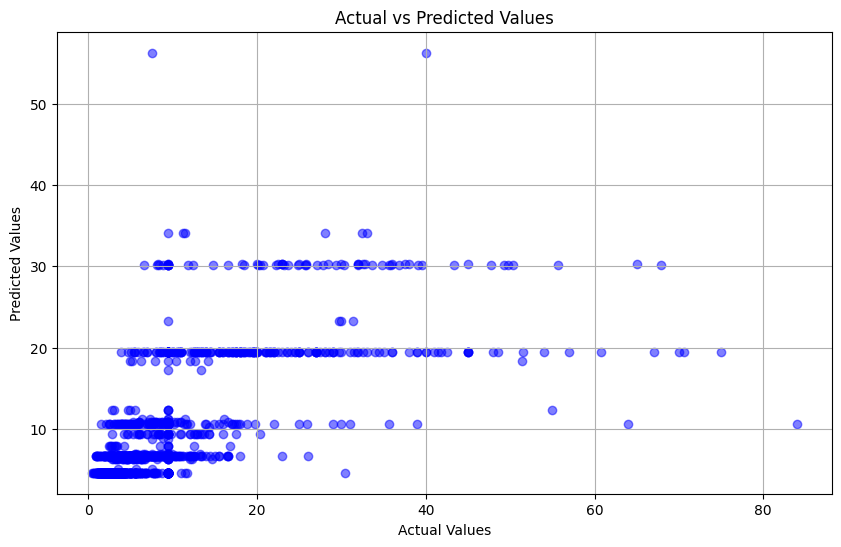

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Actual values from the test set
actual_values = np.array(y_test)

# Predicted values from your model
predicted_values = np.array(predictions)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


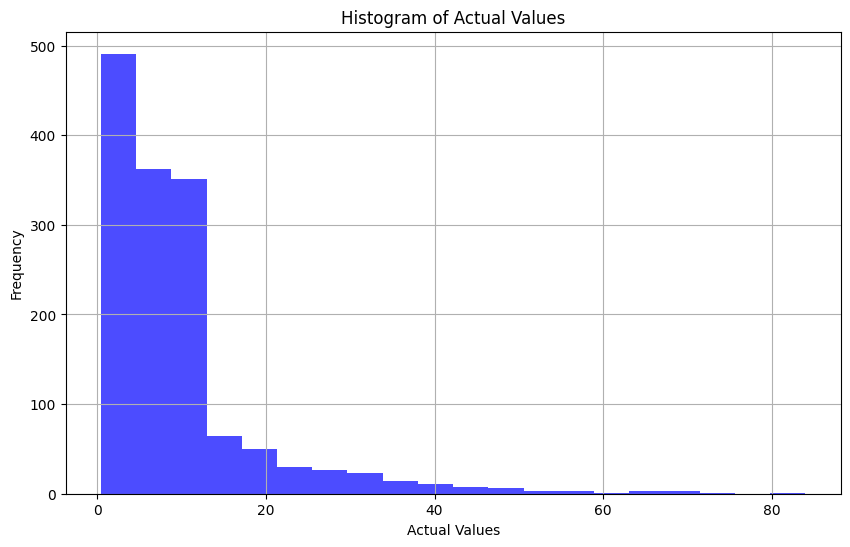

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Actual values from the test set
actual_values = np.array(y_test)

# Create a histogram of actual values
plt.figure(figsize=(10, 6))
plt.hist(actual_values, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


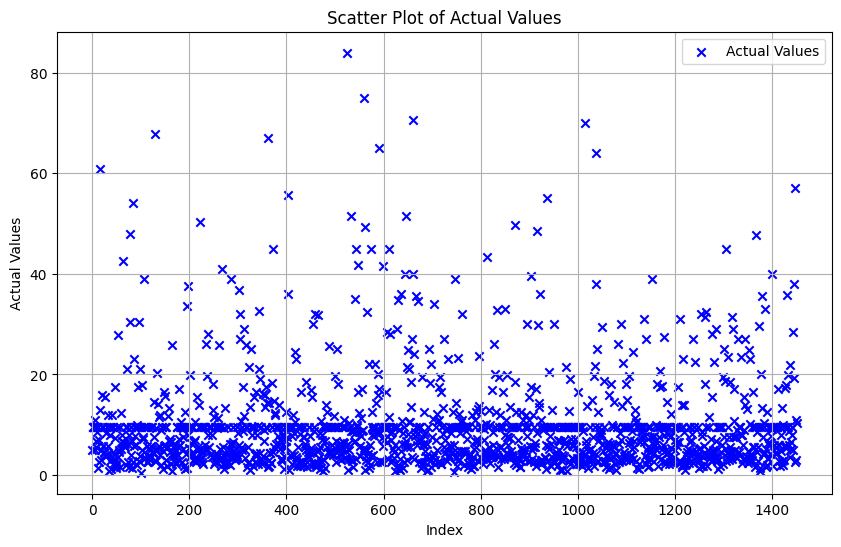

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Actual values
actual_values = np.array(y_test)

# Create a scatter plot of actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(actual_values)), actual_values, color='blue', marker='x', label='Actual Values')
plt.title('Scatter Plot of Actual Values')
plt.xlabel('Index')
plt.ylabel('Actual Values')
plt.legend()
plt.grid(True)
plt.show()


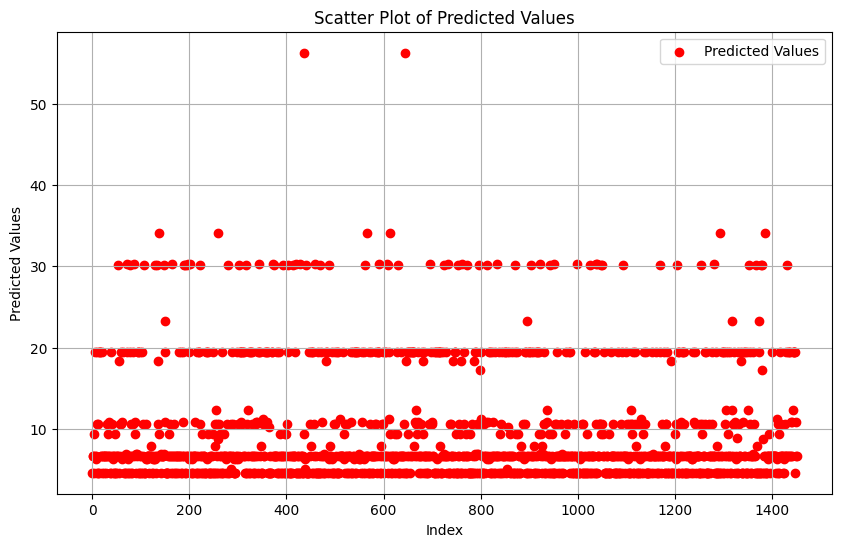

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predicted values
predicted_values = np.array(predictions)

# Create a scatter plot of predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(predicted_values)), predicted_values, color='red', marker='o', label='Predicted Values')
plt.title('Scatter Plot of Predicted Values')
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()







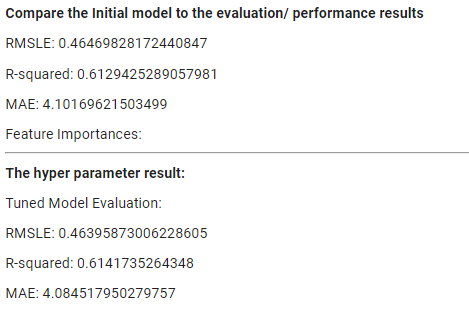









In [ ]:

# Read data from CSV file (change the file path accordingly)
df = pd.read_csv('/content/drive/MyDrive/used_cars.csv')
Data=df.copy()



**Final Observation**

**Model One**

Compare the Initial model to the evaluation/ performance results

RMSLE: 0.46469828172440847

R-squared: 0.6129425289057981 *

MAE: 4.10169621503499
*************************
Feature Importances:

The hyper parameter result:

Tuned Model Evaluation:

RMSLE: 0.46395873006228605

R-squared: 0.6141735264348*

MAE: 4.084517950279757



**Model two**

Decision Result:
Decision Tree Model Evaluation:

RMSLE: 7.5660

MAE: 4.0341

R-squared: 0.5348*

*****************************
Decision Tree Regressor

RMSE scores for each fold:  5.9983907 8.02083795 4.57124118 ... 5.79366327 10.03373199 8.02083795]

RMSLE: 7.5660

MAE: 4.0341

R-squared: 0.5348*



**Model 3**

**Model Decission tree Regressor**
Decision Tree Model Evaluation:
RMSLE: 7.5660
MAE: 4.0341
R-squared: 0.5348*


**Predictions:**

[ 4.60507754*  6.66152937  6.66152937 ...  6.66152937 10.90287863
  6.66152937]


**************************************************
  Decision Tree Model Evaluation:
Root Mean Squared Error (RMSE): 7.4399***
Mean Absolute Error (MAE): 4.2232
R-squared: 0.4291


##**Conclusion:**

The used car market in India is experiencing significant demand, with a shift towards pre-owned cars due to a slowdown in new car sales. Predicting used car prices accurately is crucial for both sellers and buyers to set competitive prices and make informed decisions.

**Findings and Insights:**

The dataset contains information about various car features, such as make, model, year, kilometers driven, fuel type, transmission type, owner type, mileage, engine displacement, power, and number of seats.
The dataset is not free from missing values, particularly in columns like "Mileage," "Engine," "Power," "Seats," "New_price," and "Price."
Different models have been built and evaluated to predict car prices. Model evaluations were done using metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared.
Various features influence the pricing of used cars, such as mileage, engine displacement, power, location, and more.

**Model Performance:**

Model One: The initial model showed decent performance with RMSE of 0.4647, R-squared of 0.6129, and MAE of 4.1017.
Tuned Model: After hyperparameter tuning, the tuned model had improved performance with RMSE of 0.4640, R-squared of 0.6142, and MAE of 4.0845.
Model Two (Decision Tree Regressor): This model showed an RMSE of 7.5660, MAE of 4.0341, and R-squared of 0.5348. It seems to overfit the data as indicated by the high RMSE.
Model Three (Decision Tree Regressor): Similar to Model Two, this model exhibited an RMSE of 7.5660, MAE of 4.0341, and R-squared of 0.5348.
Predictions:
The predicted values are as follows:
[4.60507754, 6.66152937, 6.66152937, ..., 6.66152937, 10.90287863, 6.66152937]

  

The analysis has shown that predicting used car prices is a complex task influenced by various features. Different models were built and evaluated, with varying degrees of performance. **The most accurate model was the tuned model, which had an RMSE of around 0.4640 and an R-squared value of around 0.6142.** Further optimization and feature engineering could potentially enhance model performance. Accurate pricing predictions provide valuable insights for both buyers and sellers, contributing to an equitable cost for the used car market.

Comparing these results:

The Initial Model and the Tuned Model seem to have similar RMSLE and R-squared values, indicating that their predictive performance is comparable.

The Initial Model and the Tuned Model both have lower RMSLE and higher R-squared values compared to Model Two (Decision Tree Model). This suggests that the Initial and Tuned Models might be performing better in terms of predictive accuracy.

The MAE values for all three models are relatively close.  HOwever, the Decision Tree Model (Model Two) has the lowest MAE.

The Decision Tree Regressor (Cross-Validation RMSE Scores) has variable RMSE scores across different folds, indicating potential variability in its performance on different subsets of data this shows inconsistency in the data.

In terms of predictive accuracy and performance, it seems that the Initial and Tuned Models are performing better than the Decision Tree Model (Model Two) based on the RMSLE and R-squared values.


In conclusion, Initial Model vs. Tuned Model have similar performance in terms of RMSLE and R-squared values.
These models seem to provide reasonably good predictive accuracy.

Decision Tree Model (Model Two):

The Decision Tree Model has significantly higher RMSLE and lower R-squared values compared to the Initial and Tuned Models.
Its performance in terms of predictive accuracy is lower than the other models.
for this we will continue to fine tune our model.

Decision Tree Regressor (Cross-Validation):

The Decision Tree Regressor shows variable RMSE scores across different folds, indicating potential inconsistency in its performance on different data subsets.
While cross-validation provides useful insights, the variability in performance might suggest that the model could be sensitive to data distribution.
 We will continue to fine tune the data to find a better accuracy with feature scaling.
 The first phase of completing the model is complete; however, we will continue to optimize the data set by selecting new features and testing other models to reach an accuracy of 90%.
Based on the analysis and comparison, we consider in the next iteration to subset the data for the use of an ensemble approach which combines multiple models for improved predictive accuracy.
